Formula : 

xi'= (xi - mean)/ sigma(S.D)


after scaling all the inputs in the features their mean = 0, sigma (SD)=1

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn

In [6]:
df=pd.read_csv(r"c:\Users\Admin\Downloads\Titanic-Dataset.csv",encoding='latin')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df = df[['Survived','Sex','Age','Fare']]

In [9]:
df

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500
...,...,...,...,...
886,0,male,27.0,13.0000
887,1,female,19.0,30.0000
888,0,female,NaN,23.4500
889,1,male,26.0,30.0000


In [10]:
df.sample(5)

,Survived,Sex,Age,Fare
41,0,female,27.0,21.0000
145,0,male,19.0,36.7500
169,0,male,28.0,56.4958
138,0,male,16.0,9.2167
408,0,male,21.0,7.7750


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [12]:
df['Age'].isnull().sum()

np.int64(177)

In [13]:
df['Age']=df['Age'].fillna(df['Age'].mean())

C:\Users\Admin\AppData\Local\Temp\ipykernel_5204\3884108510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].fillna(df['Age'].mean())


In [14]:
df['Age'].isnull().sum()

np.int64(0)

In [15]:
df['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

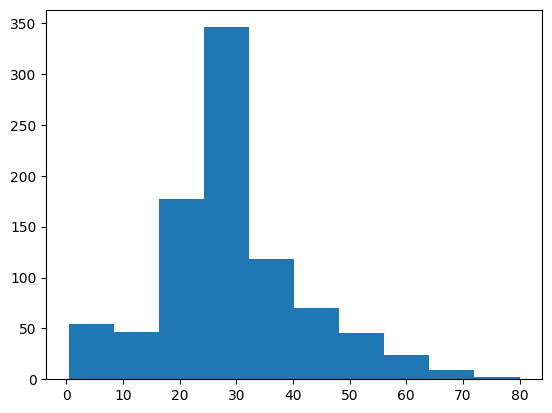

In [16]:
plt.hist(df['Age'])

In [17]:
df.describe()

,Survived,Age,Fare
count,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,13.002015,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,22.000000,7.910400
50%,0.000000,29.699118,14.454200
75%,1.000000,35.000000,31.000000
max,1.000000,80.000000,512.329200


In [18]:
df.dtypes

Survived      int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [19]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_5204\3394265979.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'male':1,'female':0})
C:\Users\Admin\AppData\Local\Temp\ipykernel_5204\3394265979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=df['Sex'].replace({'male':1,'female':0})


In [20]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [21]:
df.dtypes

Survived      int64
Sex           int64
Age         float64
Fare        float64
dtype: object

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X = df.drop(columns='Survived',axis=1)
y=df['Survived']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=0)

In [26]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [114]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [115]:
scalar.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [116]:
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [117]:
scalar.mean_

array([ 0.65308989, 29.73606122, 31.86294986])

In [118]:
X_train_scaled =pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)
X_test_scaled =pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)


In [119]:
X_train

,Sex,Age,Fare
140,0,29.699118,15.2458
439,1,31.000000,10.5000
817,1,31.000000,37.0042
378,1,20.000000,4.0125
491,1,21.000000,7.2500
...,...,...,...
835,0,39.000000,83.1583
192,0,19.000000,7.8542
629,1,29.699118,7.7333
559,0,36.000000,17.4000


In [120]:
X_train_scaled

,Sex,Age,Fare
140,-1.372075,-0.002824,-0.331679
439,0.728823,0.096629,-0.426405
817,0.728823,0.096629,0.102620
378,0.728823,-0.744332,-0.555896
491,0.728823,-0.667881,-0.491276
...,...,...,...
835,-1.372075,0.708237,1.023857
192,-1.372075,-0.820782,-0.479216
629,0.728823,-0.002824,-0.481629
559,-1.372075,0.478884,-0.288681


In [121]:
X_test

,Sex,Age,Fare
495,1,29.699118,14.4583
648,1,29.699118,7.5500
278,1,7.000000,29.1250
31,0,29.699118,146.5208
255,0,29.000000,15.2458
...,...,...,...
780,0,13.000000,7.2292
837,1,29.699118,8.0500
215,0,31.000000,113.2750
833,1,23.000000,7.8542


In [122]:
X_test_scaled

,Sex,Age,Fare
495,0.728823,-0.002824,-0.347398
648,0.728823,-0.002824,-0.485288
278,0.728823,-1.738194,-0.054650
31,-1.372075,-0.002824,2.288576
255,-1.372075,-0.056273,-0.331679
...,...,...,...
780,-1.372075,-1.279488,-0.491691
837,0.728823,-0.002824,-0.475308
215,-1.372075,0.096629,1.624988
833,0.728823,-0.514979,-0.479216


In [98]:
np.round(X_train_scaled.describe(),1) # mean = 0 , std = 1

,Sex,Age,Fare
count,712.0,712.0,712.0
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-1.4,-2.2,-0.6
25%,-1.4,-0.6,-0.5
50%,0.7,-0.0,-0.3
75%,0.7,0.4,-0.0
max,0.7,3.8,9.6


Text(0.5, 1.0, 'before scalling ')

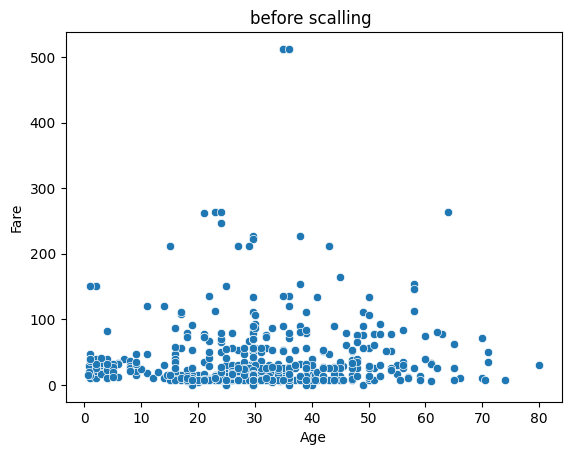

In [99]:
sns.scatterplot(x='Age',y='Fare',data=X_train)
plt.title("before scalling ")

Text(0.5, 1.0, 'After scalling ')

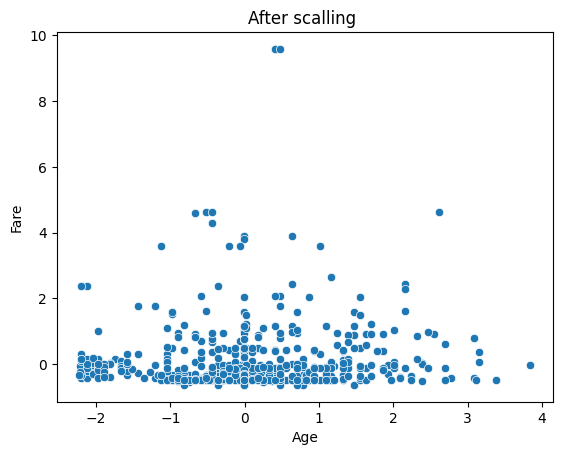

In [47]:
sns.scatterplot(x='Age',y='Fare',data=X_train_scaled)
plt.title("After scalling ")

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression()
model_scaled = LogisticRegression()

In [102]:
model.fit(X_train ,y_train)
model_scaled.fit(X_train_scaled , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [123]:
y_pred = model.predict(X_test)
y_scaled_pred = model_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [135]:
print("actual Accuracy:",np.round(accuracy_score(y_test,y_pred),1)*100)
print("scaled Accuracy :",np.round(accuracy_score(y_test,y_scaled_pred),1)*100)

actual Accuracy: 80.0
scaled Accuracy : 80.0


In [126]:
X_test

,Sex,Age,Fare
495,1,29.699118,14.4583
648,1,29.699118,7.5500
278,1,7.000000,29.1250
31,0,29.699118,146.5208
255,0,29.000000,15.2458
...,...,...,...
780,0,13.000000,7.2292
837,1,29.699118,8.0500
215,0,31.000000,113.2750
833,1,23.000000,7.8542


In [139]:
y_test.sample(5)

535    1
643    1
397    0
489    1
31     1
Name: Survived, dtype: int64

In [144]:
X_test_scaled.loc[[535,643,397,489,31]]

,Sex,Age,Fare
535,-1.372075,-1.738194,-0.112035
643,0.728823,-0.002824,0.491673
397,0.728823,1.243394,-0.117025
489,0.728823,-1.585292,-0.318621
31,-1.372075,-0.002824,2.288576


In [153]:
result = model.predict(X_test_scaled.loc[[535,643,397,489,31]])
vl=result.tolist()
print(*vl)

1 0 0 0 1
